In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("crop_production.csv")

# Basic Insights from Dataframe

In [3]:
df.sample(10)

Unnamed: 0     State_Name Crop_Type      Crop    N   P   K    pH  \
21989       21989         odisha    kharif     moong   20  40  20  5.46   
51100       51100      karnataka      rabi     wheat   60  30  30  6.10   
38523       38523      telangana      rabi  rapeseed   50  40  20  4.86   
93917       93917          bihar      rabi    barley   70  40  45  5.68   
94737       94737        haryana      rabi  rapeseed   50  40  20  4.84   
23213       23213     tamil nadu    kharif     jowar   80  40  40  5.34   
15727       15727      rajasthan    kharif   sesamum   30  15  30  6.60   
32509       32509          bihar    kharif   sesamum   30  15  30  6.50   
39441       39441  uttar pradesh    kharif  soyabean   20  60  20  5.56   
89437       89437      meghalaya    kharif    banana  100  75  50  6.32   

        rainfall  temperature  Area_in_hectares  Production_in_tons  \
21989  1145.2200    28.500000            1801.0               382.8   
51100   199.2125    21.300000             658.0               932.0   
38523    98.9400    25.574000               9.0                 4.0   
93917    87.2000    23.106000             143.0               377.0   
94737    41.3000    21.704000           62452.0            125000.0   
23213   297.6600    29.566667            3788.0              4045.0   
15727   510.0500    33.373333            1121.0                83.0   
32509   840.4600    33.583333             235.0               178.0   
39441   579.7500    34.010000               9.0                 1.0   
89437   423.7450    22.070000             760.0              7990.0   

       Yield_ton_per_hec  
21989           0.212549  
51100           1.416413  
38523           0.444444  
93917           2.636364  
94737           2.001537  
23213           1.067846  
15727           0.074041  
32509           0.757447  
39441           0.111111  
89437          10.513158

In [4]:
df.head()

Unnamed: 0      State_Name Crop_Type       Crop    N   P   K    pH  \
0           0  andhra pradesh    kharif     cotton  120  40  20  5.46   
1           1  andhra pradesh    kharif  horsegram   20  60  20  6.18   
2           2  andhra pradesh    kharif      jowar   80  40  40  5.42   
3           3  andhra pradesh    kharif      maize   80  40  20  5.62   
4           4  andhra pradesh    kharif      moong   20  40  20  5.68   

   rainfall  temperature  Area_in_hectares  Production_in_tons  \
0    654.34    29.266667            7300.0              9400.0   
1    654.34    29.266667            3300.0              1000.0   
2    654.34    29.266667           10100.0             10200.0   
3    654.34    29.266667            2800.0              4900.0   
4    654.34    29.266667            1300.0               500.0   

   Yield_ton_per_hec  
0           1.287671  
1           0.303030  
2           1.009901  
3           1.750000  
4           0.384615

In [5]:
df.shape

(99849, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99849 entries, 0 to 99848
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          99849 non-null  int64  
 1   State_Name          99849 non-null  object 
 2   Crop_Type           99849 non-null  object 
 3   Crop                99849 non-null  object 
 4   N                   99849 non-null  int64  
 5   P                   99849 non-null  int64  
 6   K                   99849 non-null  int64  
 7   pH                  99849 non-null  float64
 8   rainfall            99849 non-null  float64
 9   temperature         99849 non-null  float64
 10  Area_in_hectares    99849 non-null  float64
 11  Production_in_tons  99849 non-null  float64
 12  Yield_ton_per_hec   99849 non-null  float64
dtypes: float64(6), int64(4), object(3)
memory usage: 9.9+ MB


In [7]:
df.isnull().mean()*100

Unnamed: 0            0.0
State_Name            0.0
Crop_Type             0.0
Crop                  0.0
N                     0.0
P                     0.0
K                     0.0
pH                    0.0
rainfall              0.0
temperature           0.0
Area_in_hectares      0.0
Production_in_tons    0.0
Yield_ton_per_hec     0.0
dtype: float64

#### Hence there are no missing values

#### We will remove the first, N, K, and P columns as they are not of much use to us

In [8]:
df=df.drop(columns=["Unnamed: 0","N","K","P"])

#### Renaming columns for the sake of convenience

In [9]:
df.rename(columns={'Crop_Type': 'Season', 'State_Name': 'State', 'rainfall': 'Rainfall', 'temperature': 'Temperature', 'Area_in_hectares': 'Area', 'Production_in_tons': 'Production', 'Yield_ton_per_hec': 'Yield'}, inplace=True)

In [10]:
df.sample(10)

State      Season      Crop    pH  Rainfall  Temperature  \
3174       tamil nadu  whole year     onion  6.10   884.500    27.654545   
47147       telangana  whole year    tomato  5.94   942.800    28.994545   
97651          punjab        rabi     wheat  6.30    66.520    20.312000   
61258       rajasthan        rabi  rapeseed  5.18    19.380    22.766000   
74154  madhya pradesh        rabi    barley  5.42    73.470    23.562000   
50499         haryana      kharif      rice  5.66   331.880    35.346667   
10047   uttar pradesh        rabi  rapeseed  5.16    75.320    22.676000   
93222           assam        rabi    banana  6.36   127.680    20.800000   
87139    chhattisgarh  whole year    garlic  5.66  1299.260    26.518182   
13374       karnataka      kharif     moong  5.38  1246.715    22.600000   

           Area  Production      Yield  
3174      382.0      2900.0   7.591623  
47147     787.0      5499.0   6.987294  
97651  108000.0    480000.0   4.444444  
61258    6720.0      7178.0   1.068155  
74154     135.0       257.0   1.903704  
50499   73580.0    233000.0   3.166621  
10047    9145.0      5512.0   0.602734  
93222    1604.0     21678.0  13.514963  
87139       6.0        17.0   2.833333  
13374     128.0        44.0   0.343750

In [11]:
df.shape

(99849, 9)

In [12]:
df.describe(include="all")

State  Season   Crop            pH      Rainfall  \
count           99849   99849  99849  99849.000000  99849.000000   
unique             33       4     53           NaN           NaN   
top     uttar pradesh  kharif   rice           NaN           NaN   
freq            12598   38758  11430           NaN           NaN   
mean              NaN     NaN    NaN      5.643624    701.151085   
std               NaN     NaN    NaN      0.505283    604.701552   
min               NaN     NaN    NaN      3.820000      3.274569   
25%               NaN     NaN    NaN      5.360000    157.310000   
50%               NaN     NaN    NaN      5.540000    579.750000   
75%               NaN     NaN    NaN      5.960000   1110.780000   
max               NaN     NaN    NaN      7.000000   3322.060000   

         Temperature           Area    Production         Yield  
count   99849.000000   99849.000000  9.984900e+04  99849.000000  
unique           NaN            NaN           NaN           NaN  
top              NaN            NaN           NaN           NaN  
freq             NaN            NaN           NaN           NaN  
mean       26.684154   16476.585668  3.776291e+04      3.931149  
std         4.851214   43604.268231  1.222447e+05     33.872242  
min         1.180000       0.580000  0.000000e+00      0.000000  
25%        23.106000     130.000000  1.620000e+02      0.586207  
50%        27.333333    1010.000000  1.506000e+03      1.329268  
75%        29.266667    8099.000000  1.439500e+04      2.997288  
max        35.346667  726300.000000  3.530571e+06   9801.000000

In [13]:
df.duplicated().sum()

0

# Visualization and Dealing with of Categorical Data

33

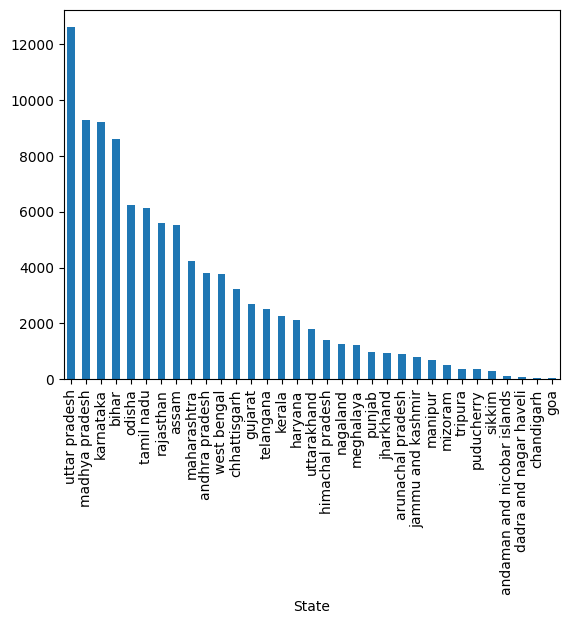

In [14]:
df['State'].value_counts().plot(kind="bar")
df['State'].nunique()

In [15]:
unique_states = sorted(df['State'].unique())
print("Unique categories of 'State' sorted alphabetically:")
print(unique_states)

Unique categories of 'State' sorted alphabetically:
['andaman and nicobar islands', 'andhra pradesh', 'arunachal pradesh', 'assam', 'bihar', 'chandigarh', 'chhattisgarh', 'dadra and nagar haveli', 'goa', 'gujarat', 'haryana', 'himachal pradesh', 'jammu and kashmir', 'jharkhand', 'karnataka', 'kerala', 'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland', 'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim', 'tamil nadu', 'telangana', 'tripura', 'uttar pradesh', 'uttarakhand', 'west bengal']


4

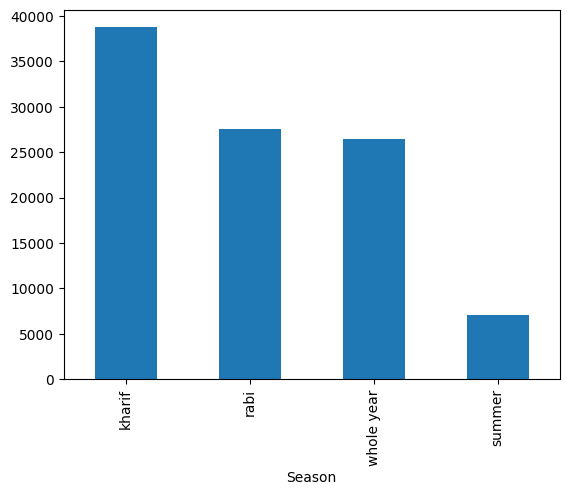

In [16]:
df['Season'].value_counts().plot(kind="bar")
df['Season'].nunique()

53

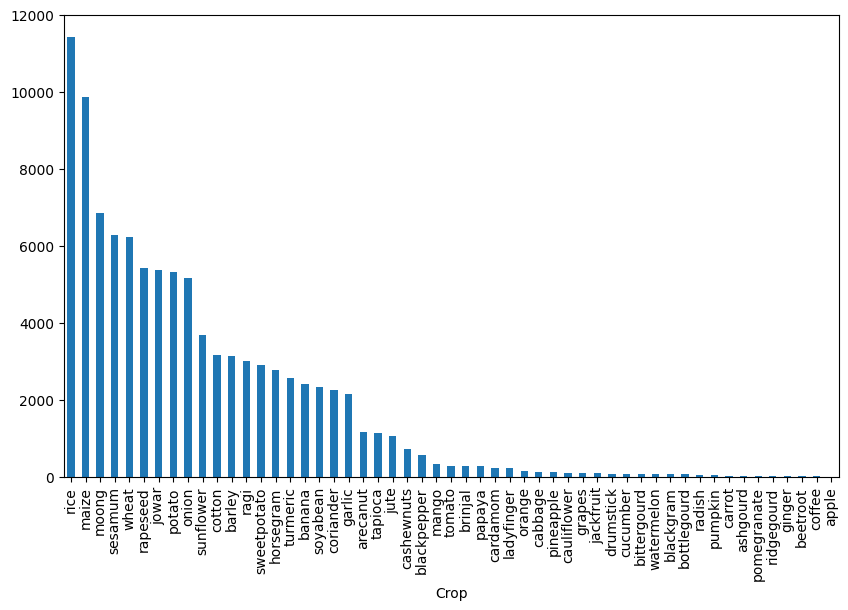

In [17]:
df['Crop'].value_counts().plot(kind="bar",figsize=(10,6))
df['Crop'].nunique()

In [18]:
df['Crop'].value_counts()

Crop
rice           11430
maize           9857
moong           6855
sesamum         6291
wheat           6225
rapeseed        5413
jowar           5369
potato          5324
onion           5164
sunflower       3682
cotton          3157
barley          3139
ragi            2995
sweetpotato     2899
horsegram       2784
turmeric        2562
banana          2409
soyabean        2325
coriander       2253
garlic          2138
arecanut        1154
tapioca         1134
jute            1058
cashewnuts       732
blackpepper      571
mango            330
tomato           284
brinjal          282
papaya           281
cardamom         237
ladyfinger       217
orange           146
cabbage          125
pineapple        117
cauliflower      105
grapes           104
jackfruit         90
drumstick         73
cucumber          72
bittergourd       67
watermelon        59
blackgram         58
bottlegourd       58
radish            45
pumpkin           37
carrot            28
ashgourd          28
pomegran

In [19]:
unique_crops = sorted(df['Crop'].unique())
print("Unique categories of 'Crop' sorted alphabetically:")
print(unique_crops)

Unique categories of 'Crop' sorted alphabetically:
['apple', 'arecanut', 'ashgourd', 'banana', 'barley', 'beetroot', 'bittergourd', 'blackgram', 'blackpepper', 'bottlegourd', 'brinjal', 'cabbage', 'cardamom', 'carrot', 'cashewnuts', 'cauliflower', 'coffee', 'coriander', 'cotton', 'cucumber', 'drumstick', 'garlic', 'ginger', 'grapes', 'horsegram', 'jackfruit', 'jowar', 'jute', 'ladyfinger', 'maize', 'mango', 'moong', 'onion', 'orange', 'papaya', 'pineapple', 'pomegranate', 'potato', 'pumpkin', 'radish', 'ragi', 'rapeseed', 'rice', 'ridgegourd', 'sesamum', 'soyabean', 'sunflower', 'sweetpotato', 'tapioca', 'tomato', 'turmeric', 'watermelon', 'wheat']


#### Deleting data occurances having frequency below 100

In [20]:
threshold = 100
count = df['Crop'].value_counts()
crops_to_keep = count[count >= threshold].index
df = df[df['Crop'].isin(crops_to_keep)]

In [21]:
df['Crop'].value_counts()

Crop
rice           11430
maize           9857
moong           6855
sesamum         6291
wheat           6225
rapeseed        5413
jowar           5369
potato          5324
onion           5164
sunflower       3682
cotton          3157
barley          3139
ragi            2995
sweetpotato     2899
horsegram       2784
turmeric        2562
banana          2409
soyabean        2325
coriander       2253
garlic          2138
arecanut        1154
tapioca         1134
jute            1058
cashewnuts       732
blackpepper      571
mango            330
tomato           284
brinjal          282
papaya           281
cardamom         237
ladyfinger       217
orange           146
cabbage          125
pineapple        117
cauliflower      105
grapes           104
Name: count, dtype: int64

36

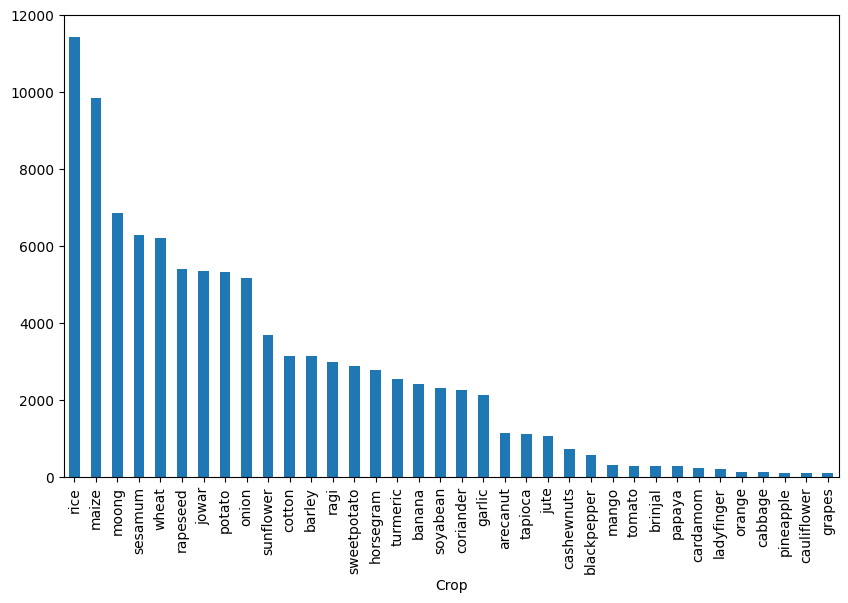

In [22]:
df['Crop'].value_counts().plot(kind="bar",figsize=(10,6))
df['Crop'].nunique()

### Performing one hot encoding on Categorical Columns

In [23]:
#Using one hot encoding on the "Season" column
df_dummy=pd.get_dummies(df["Season"],drop_first=True)
df=pd.concat([df,df_dummy],axis=1)

#### Removed Kharif Season

In [24]:
#Using one hot encoding on the "Season" column
df_dummy=pd.get_dummies(df["Crop"],drop_first=True)
df=pd.concat([df,df_dummy],axis=1)

#### Removed the Arecanaut crop

In [25]:
# Using one hot encoding on the "State" column
df_dummy=pd.get_dummies(df["State"],drop_first=True)
df=pd.concat([df,df_dummy],axis=1)

#### Removed Andaman and Nicobar Islands

In [26]:
df = df.drop(columns=["Season","Crop","State"])
df.sample(10)

pH   Rainfall  Temperature     Area  Production      Yield   rabi  \
39143  5.38   579.7500    34.010000  23959.0     37592.0   1.569014  False   
77228  5.50    34.8100    34.666667    108.0       155.0   1.435185  False   
85086  4.94    75.3200    22.676000   4799.0     81896.0  17.065222   True   
57405  6.32  1026.6400    29.186364     33.0        26.0   0.787879  False   
59986  5.62    70.1100    25.600000  18200.0      8700.0   0.478022   True   
13000  5.12  1603.2375    22.890909    227.0       719.0   3.167401  False   
2435   4.86    56.2360    15.852000    257.0       176.0   0.684825   True   
91358  5.68   579.7500    34.010000    688.0       747.0   1.085756  False   
56653  6.48  2169.3200    23.736364   1778.0     24742.0  13.915636  False   
70527  5.10   152.5400    22.280000   4001.0      2185.0   0.546113   True   

       summer  whole year  banana  ...  puducherry  punjab  rajasthan  sikkim  \
39143   False       False   False  ...       False   False      False   False   
77228    True       False   False  ...       False   False      False   False   
85086   False       False   False  ...       False   False      False   False   
57405   False        True   False  ...       False   False      False   False   
59986   False       False   False  ...       False   False      False   False   
13000   False        True   False  ...       False   False      False   False   
2435    False       False   False  ...       False   False      False   False   
91358   False       False   False  ...       False   False      False   False   
56653   False        True    True  ...       False   False      False   False   
70527   False       False   False  ...       False   False      False   False   

       tamil nadu  telangana  tripura  uttar pradesh  uttarakhand  west bengal  
39143       False      False    False           True        False        False  
77228       False      False    False           True        False        False  
85086       False      False    False           True        False        False  
57405       False      False    False          False        False        False  
59986       False      False    False          False        False        False  
13000       False      False    False          False        False        False  
2435        False      False    False          False        False        False  
91358       False      False    False           True        False        False  
56653       False      False    False          False        False        False  
70527       False      False    False          False        False         True  

[10 rows x 76 columns]

In [27]:
# Check for duplicate column names
duplicate_columns = df.columns[df.columns.duplicated()]
print("Duplicate columns:", duplicate_columns)

Duplicate columns: Index([], dtype='object')


In [28]:
# Remove duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# Display the resulting dataframe to verify duplicates are removed
df.head()

pH  Rainfall  Temperature     Area  Production     Yield   rabi  summer  \
0  5.46    654.34    29.266667   7300.0      9400.0  1.287671  False   False   
1  6.18    654.34    29.266667   3300.0      1000.0  0.303030  False   False   
2  5.42    654.34    29.266667  10100.0     10200.0  1.009901  False   False   
3  5.62    654.34    29.266667   2800.0      4900.0  1.750000  False   False   
4  5.68    654.34    29.266667   1300.0       500.0  0.384615  False   False   

   whole year  banana  ...  puducherry  punjab  rajasthan  sikkim  tamil nadu  \
0       False   False  ...       False   False      False   False       False   
1       False   False  ...       False   False      False   False       False   
2       False   False  ...       False   False      False   False       False   
3       False   False  ...       False   False      False   False       False   
4       False   False  ...       False   False      False   False       False   

   telangana  tripura  uttar pradesh  uttarakhand  west bengal  
0      False    False          False        False        False  
1      False    False          False        False        False  
2      False    False          False        False        False  
3      False    False          False        False        False  
4      False    False          False        False        False  

[5 rows x 76 columns]

# Visualization and Dealing with of Numerical Data

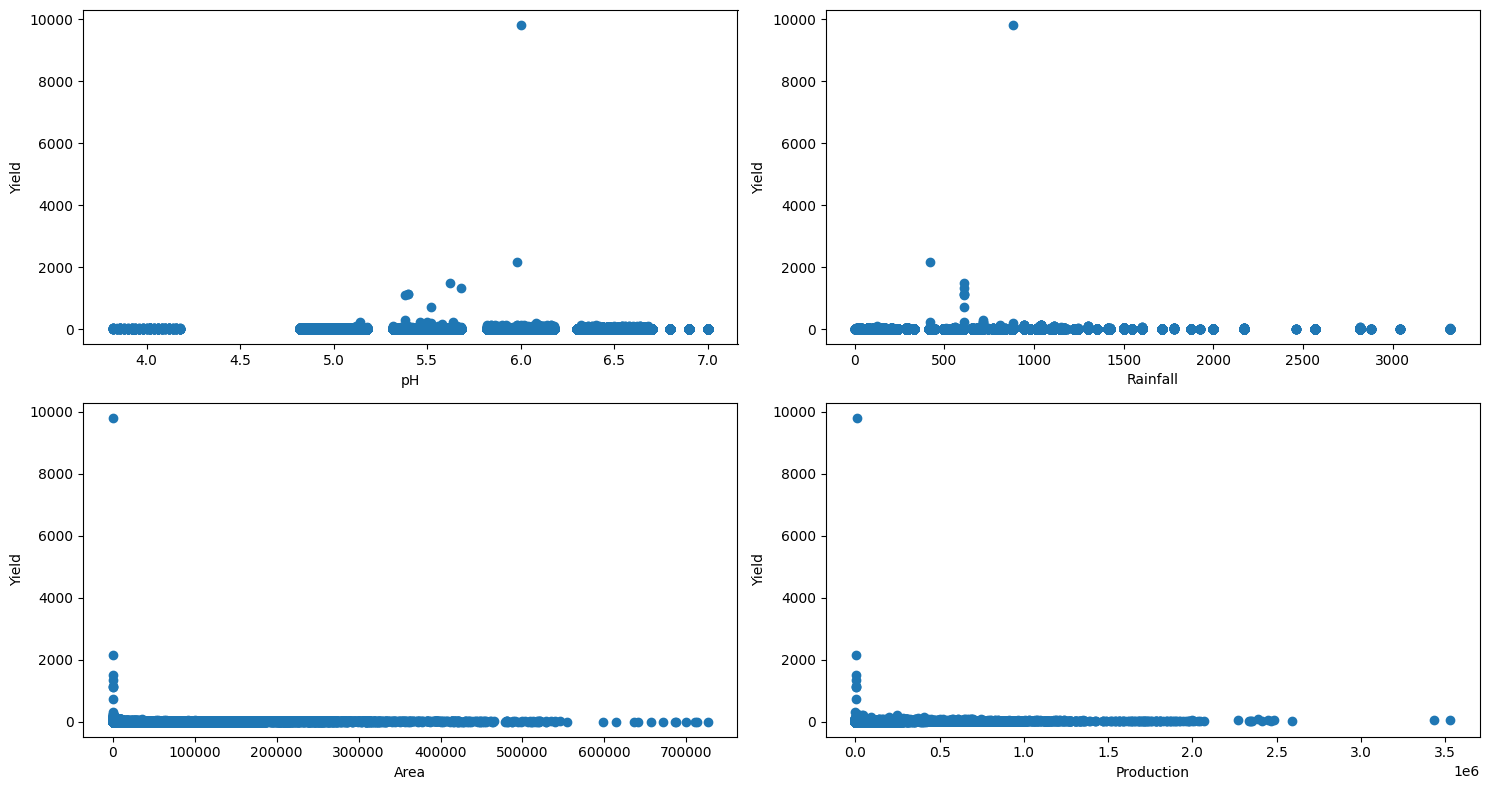

In [29]:
# Columns to plot
columns_to_plot = ['pH', 'Rainfall', 'Area', 'Production']

# Calculate number of rows and columns needed
num_rows = 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 8))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Plot each column against 'Yield'
for i, column in enumerate(columns_to_plot):
    axes[i].scatter(df[column], df['Yield'])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Yield')

# Remove empty subplots
for j in range(len(columns_to_plot), num_rows*num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [30]:
df.shape

(99148, 76)

### Here we can see that some of these columns are skewed heavily so we will work on that

#### Limiting the Area column to 10,000 hectares and remove unimportant rows

In [31]:
df['Area'].describe()

count     99148.000000
mean      16587.743871
std       43736.781624
min           0.580000
25%         134.000000
50%        1035.000000
75%        8229.250000
max      726300.000000
Name: Area, dtype: float64

In [32]:
df['Area'].value_counts()

Area
2.0         617
5.0         593
3.0         579
1.0         578
4.0         560
           ... 
11521.0       1
207730.0      1
15551.0       1
15657.0       1
152676.0      1
Name: count, Length: 26335, dtype: int64

##### As we can see here the data for Area varies wildly and according to research usually the largest crop area that farmers can use in India is 5,000 hectares. So we will remove the area before that

In [33]:
df = df[df['Area'] <= 5000]
df.shape

(68960, 76)

In [34]:
pd.set_option('display.max_rows', None)
df['Area'].value_counts()

Area
2.00       617
5.00       593
3.00       579
1.00       578
4.00       560
10.00      521
6.00       490
7.00       447
8.00       437
20.00      418
15.00      417
9.00       412
100.00     397
12.00      386
11.00      373
14.00      342
30.00      338
13.00      333
16.00      333
17.00      330
25.00      318
18.00      309
200.00     304
19.00      275
23.00      273
40.00      272
21.00      269
50.00      265
300.00     262
22.00      255
26.00      246
27.00      229
29.00      225
28.00      222
400.00     220
24.00      216
60.00      216
80.00      207
500.00     202
33.00      202
45.00      201
31.00      200
34.00      195
42.00      191
35.00      190
32.00      188
39.00      187
1000.00    183
70.00      181
600.00     180
38.00      179
46.00      177
36.00      176
90.00      174
47.00      172
56.00      172
51.00      170
55.00      168
110.00     166
53.00      166
52.00      164
37.00      163
800.00     163
43.00      162
44.00      162
41.00      158
700.0

In [35]:
#Removing rows which have occurances less than 50
threshold = 50
count = df['Area'].value_counts()
crops_to_keep = count[count >= threshold].index
df = df[df['Area'].isin(crops_to_keep)]

In [36]:
df['Area'].describe()

count    34455.000000
mean       232.652358
std        583.060017
min          1.000000
25%         20.000000
50%         64.000000
75%        150.000000
max       5000.000000
Name: Area, dtype: float64

#### Performing log transformation on Production and Area column

In [37]:
# Apply logarithmic transformation (log base e)
df['Production'] = df['Production'].apply(lambda x: np.log(x) if x > 0 else 0)
df['Area'] = df['Area'].apply(lambda x: np.log(x) if x > 0 else 0)

### Histograms

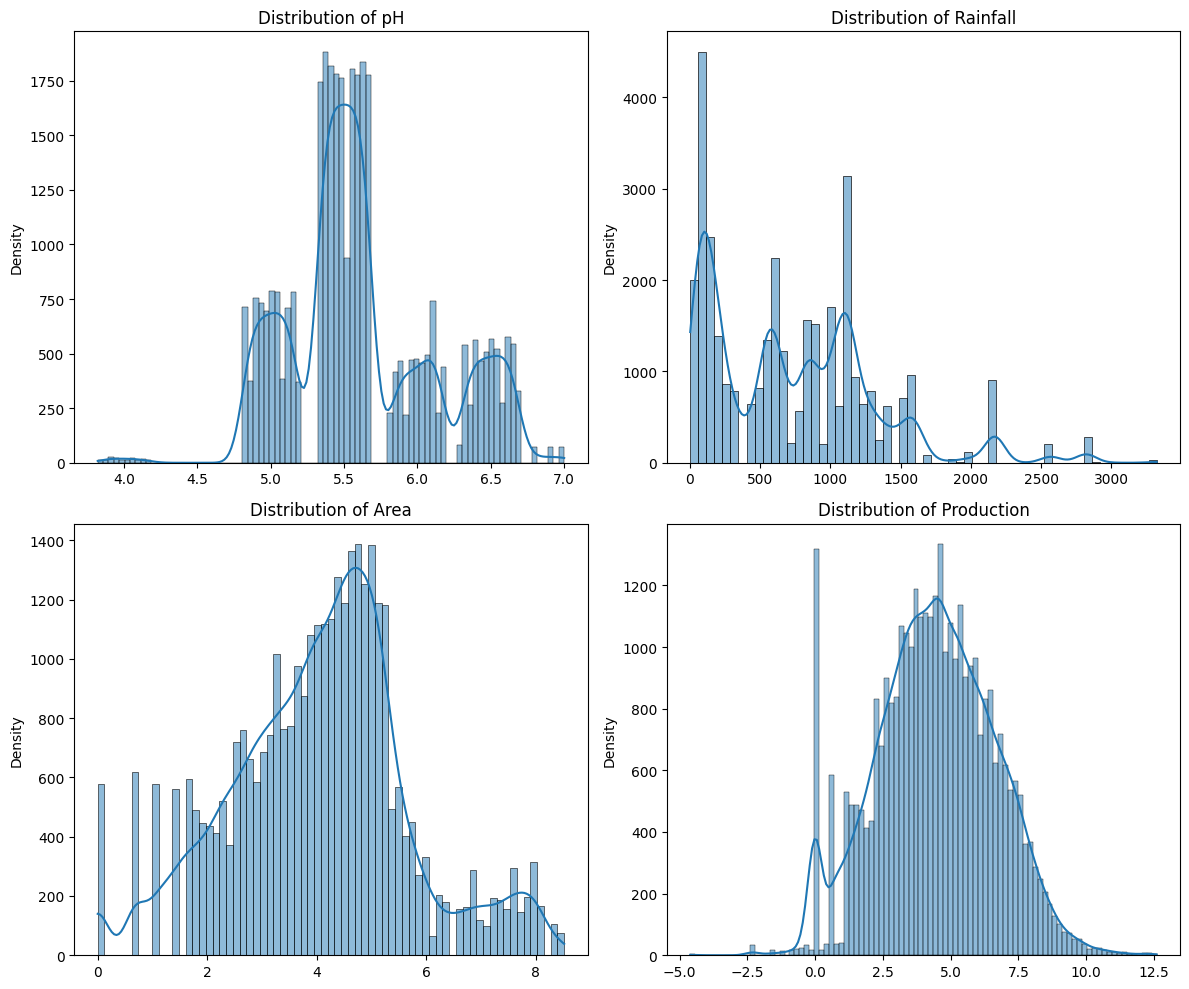

In [38]:
# Define the numeric columns
numeric_columns = ['pH', 'Rainfall', 'Area', 'Production']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot distplots for each numeric column
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()


### Boxplots

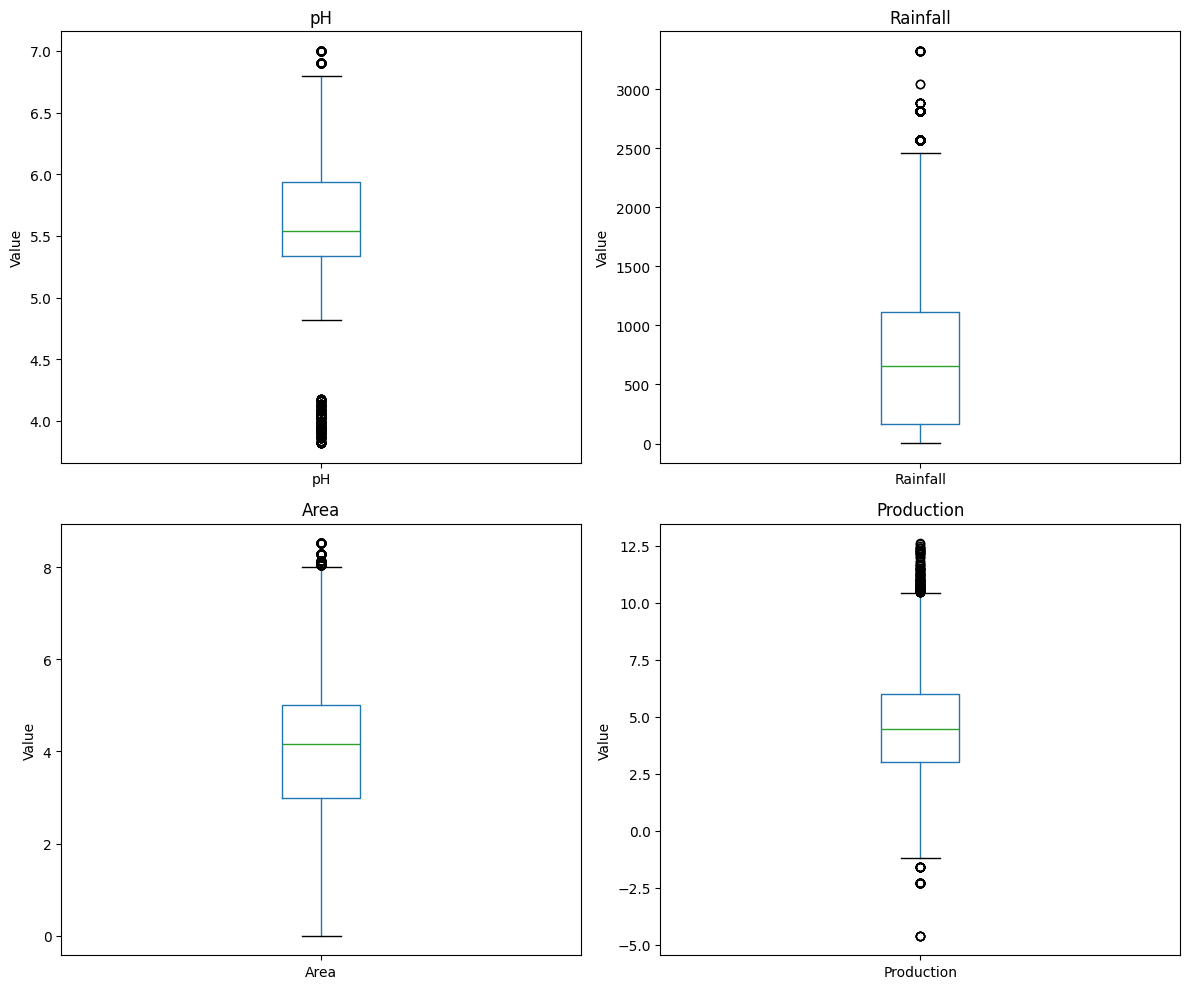

In [39]:
import matplotlib.pyplot as plt

# Numeric columns to plot
numeric_columns = ['pH', 'Rainfall', 'Area', 'Production']

# Calculate number of rows and columns needed
num_rows = 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 10))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Plot boxplots for each numeric column
for i, column in enumerate(numeric_columns):
    df.boxplot(column, ax=axes[i], grid=False)
    axes[i].set_title(column)
    axes[i].set_ylabel('Value')

# Remove empty subplots
for j in range(len(numeric_columns), num_rows*num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#### As we can see from the boxplots we have a lot of outliers so we will remove them

In [40]:
# Finding the IQR
num_cols=[]
for i in ['pH', 'Rainfall', 'Area', 'Production']:
    p25 = df[i].quantile(0.25)
    p75 = df[i].quantile(0.75)
    iqr = p75 - p25
    ulimit = p75 + 1.5 * iqr
    llimit = p25 - 1.5 * iqr
    df = df[df[i] < ulimit]
df.shape

(33360, 76)

In [41]:
p25=df['pH'].quantile(0.25)
p75=df['pH'].quantile(0.75)
iqr=p75-p25
llimit = p25 - 1.2 * iqr
df = df[df['pH'] > llimit ] 
df.shape

(33186, 76)

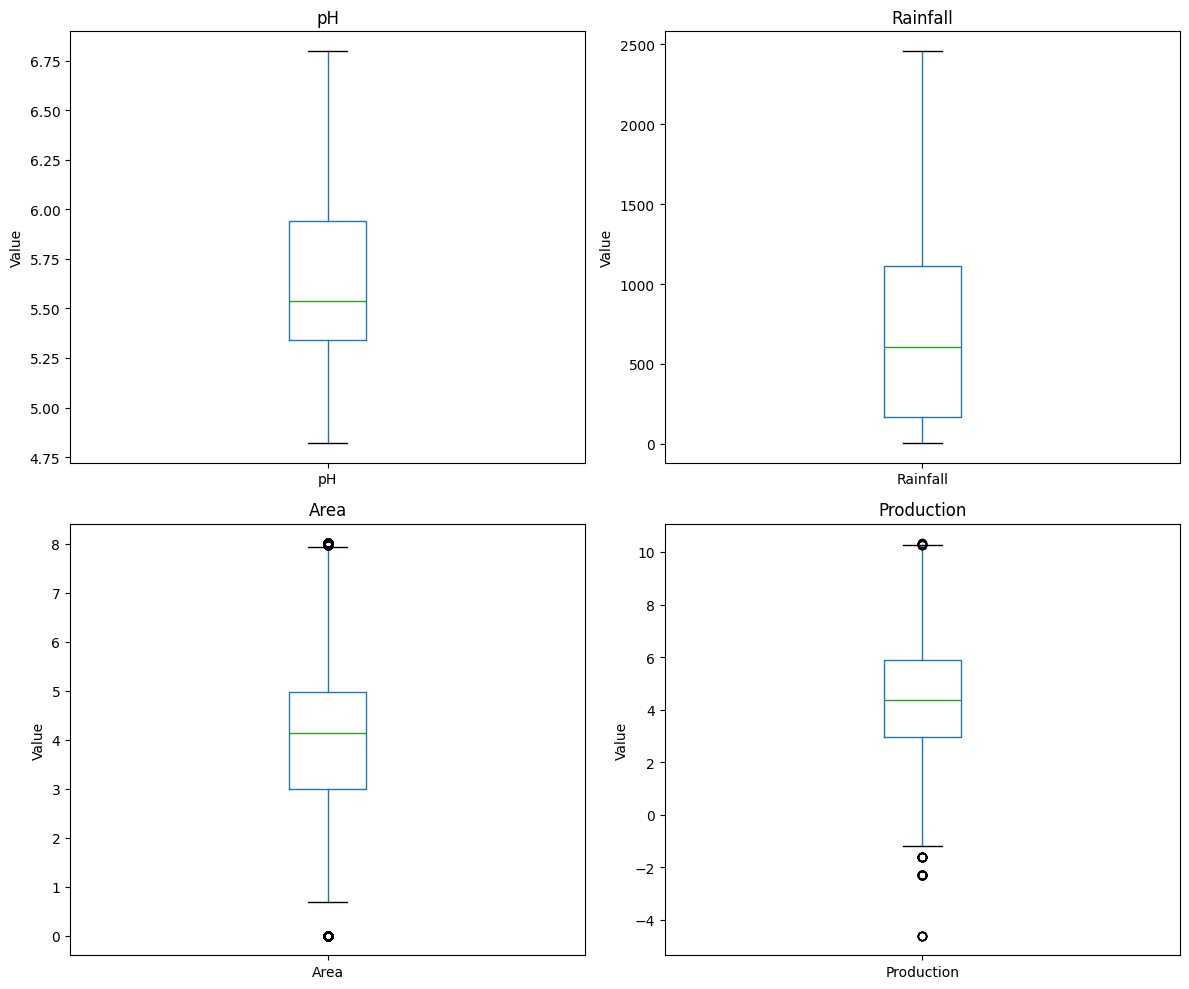

In [42]:
import matplotlib.pyplot as plt

# Numeric columns to plot
numeric_columns = ['pH', 'Rainfall', 'Area', 'Production']

# Calculate number of rows and columns needed
num_rows = 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 10))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Plot boxplots for each numeric column
for i, column in enumerate(numeric_columns):
    df.boxplot(column, ax=axes[i], grid=False)
    axes[i].set_title(column)
    axes[i].set_ylabel('Value')

# Remove empty subplots
for j in range(len(numeric_columns), num_rows*num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


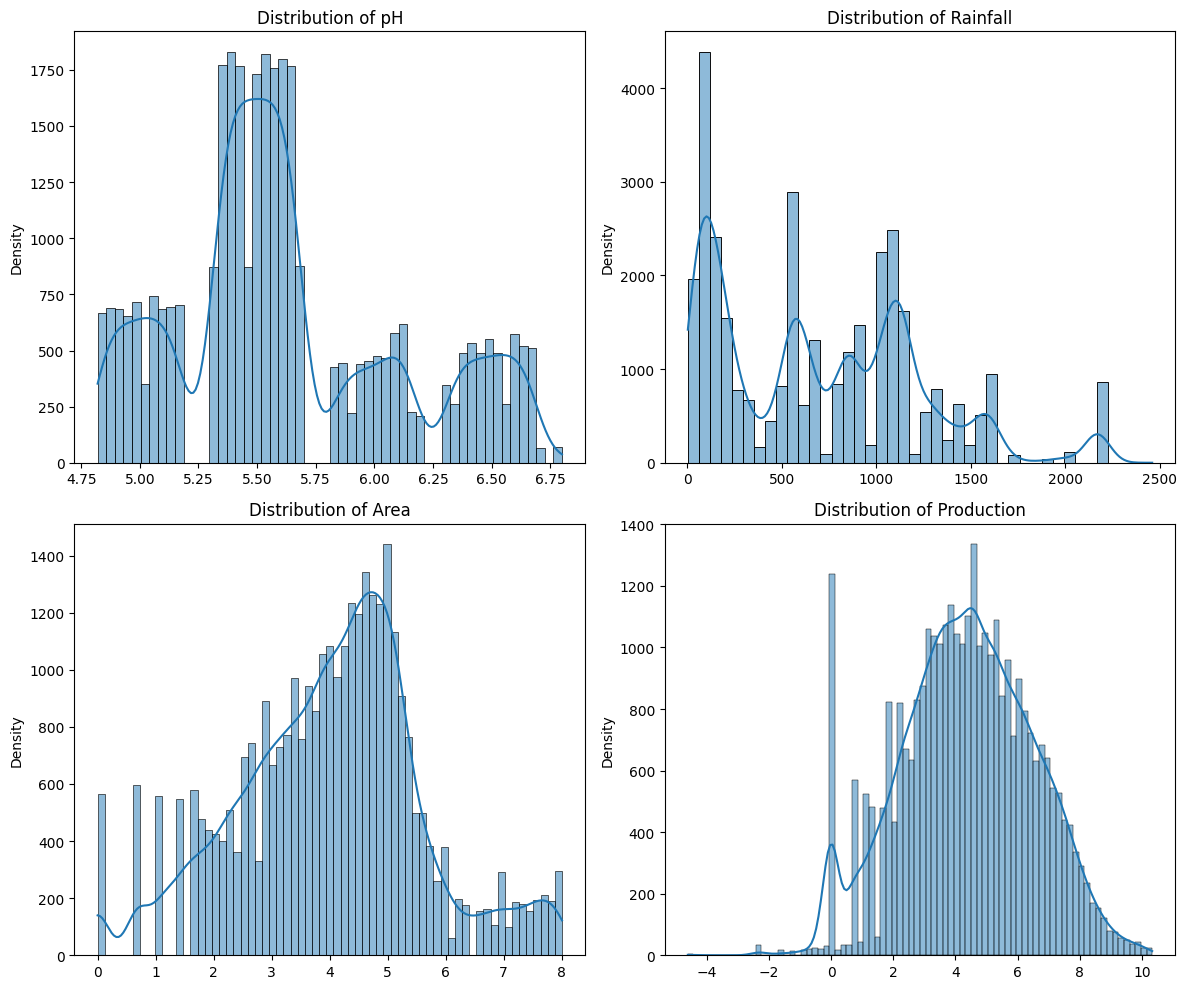

In [43]:
# Define the numeric columns
numeric_columns = ['pH', 'Rainfall', 'Area', 'Production']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot distplots for each numeric column
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.show()


### Scatter plots for all numerical columns vs Yield

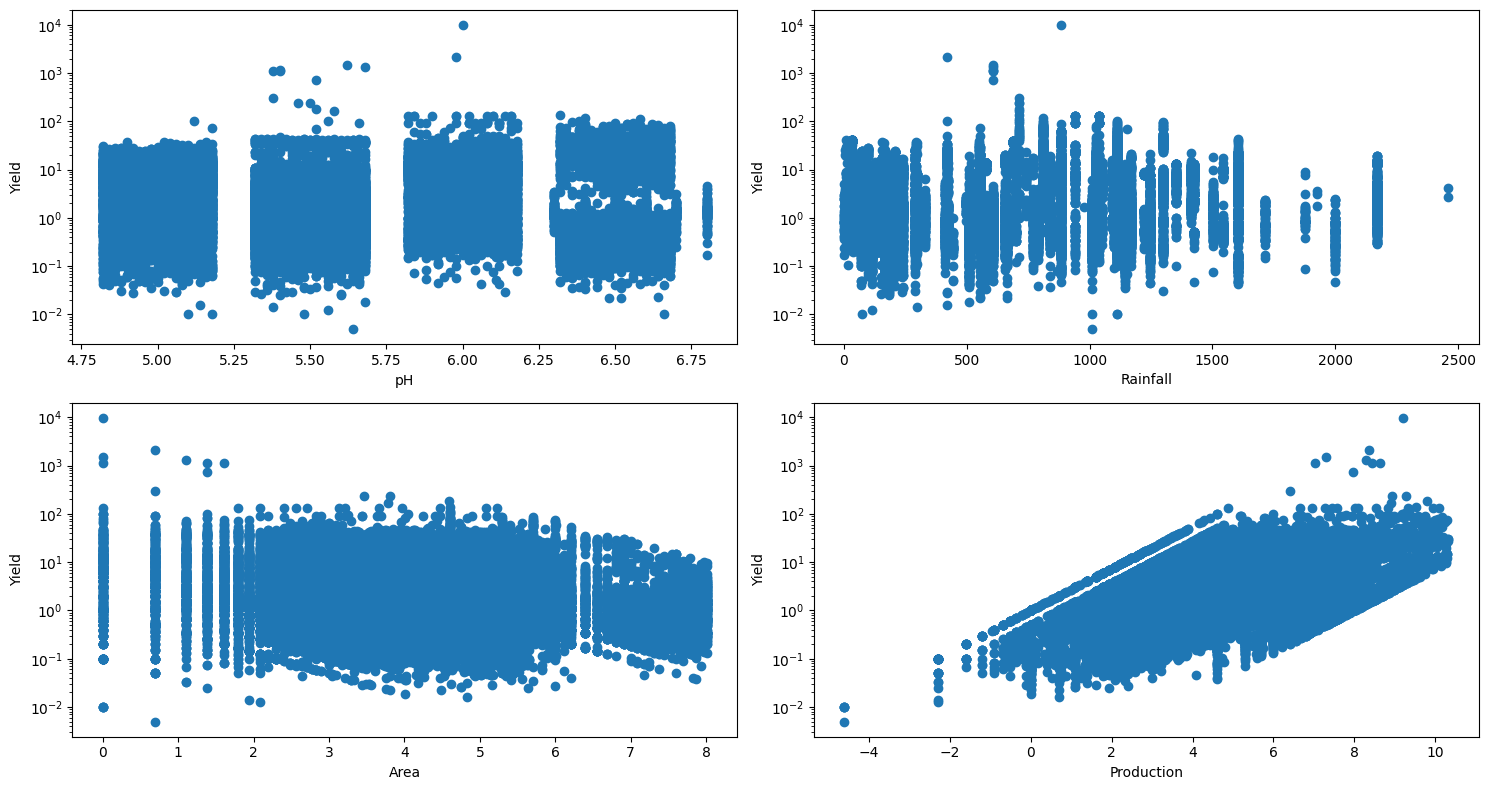

In [44]:
# Columns to plot
columns_to_plot = ['pH', 'Rainfall', 'Area', 'Production']

# Calculate number of rows and columns needed
num_rows = 2
num_cols = 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 8))

# Flatten the axes array to iterate over each subplot
axes = axes.flatten()

# Plot each column against 'Yield' with log scale on y-axis
for i, column in enumerate(columns_to_plot):
    axes[i].scatter(df[column], df['Yield'])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Yield')
    axes[i].set_yscale('log')  # Set y-axis to log scale

# Remove empty subplots
for j in range(len(columns_to_plot), num_rows*num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Pairplots between all numerical features

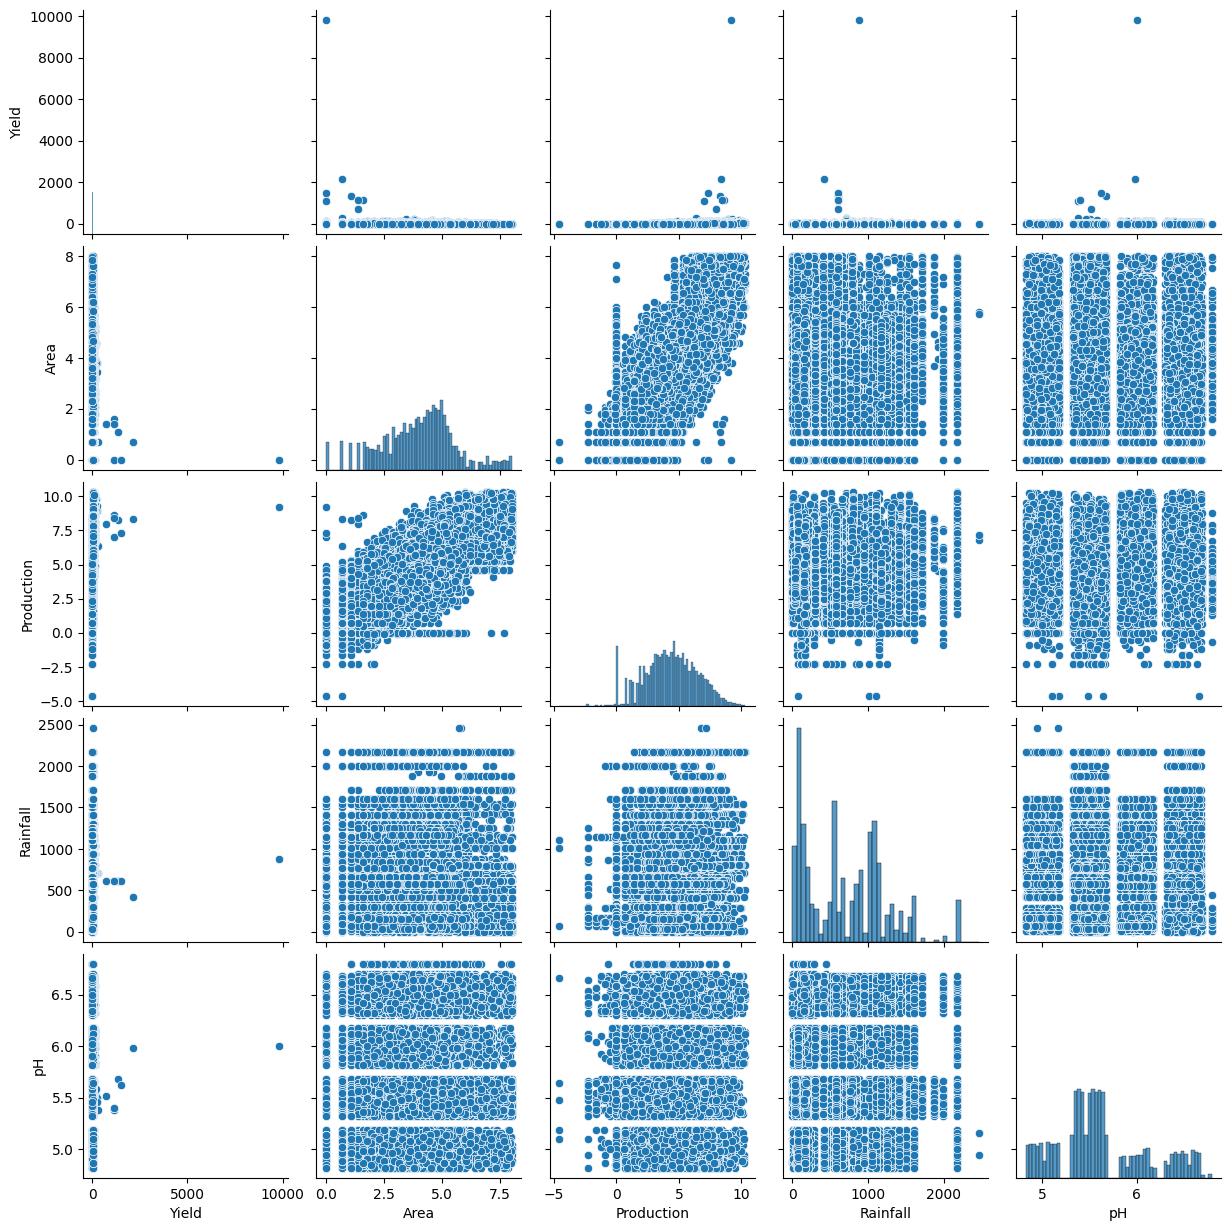

In [45]:
columns_to_plot = ['Yield', 'Area', 'Production', 'Rainfall', 'pH']
df_selected = df[columns_to_plot]

# Create the pairplot
sns.pairplot(df_selected)
plt.show()

### Heatmap showing correlation between each of the features

<Axes: >

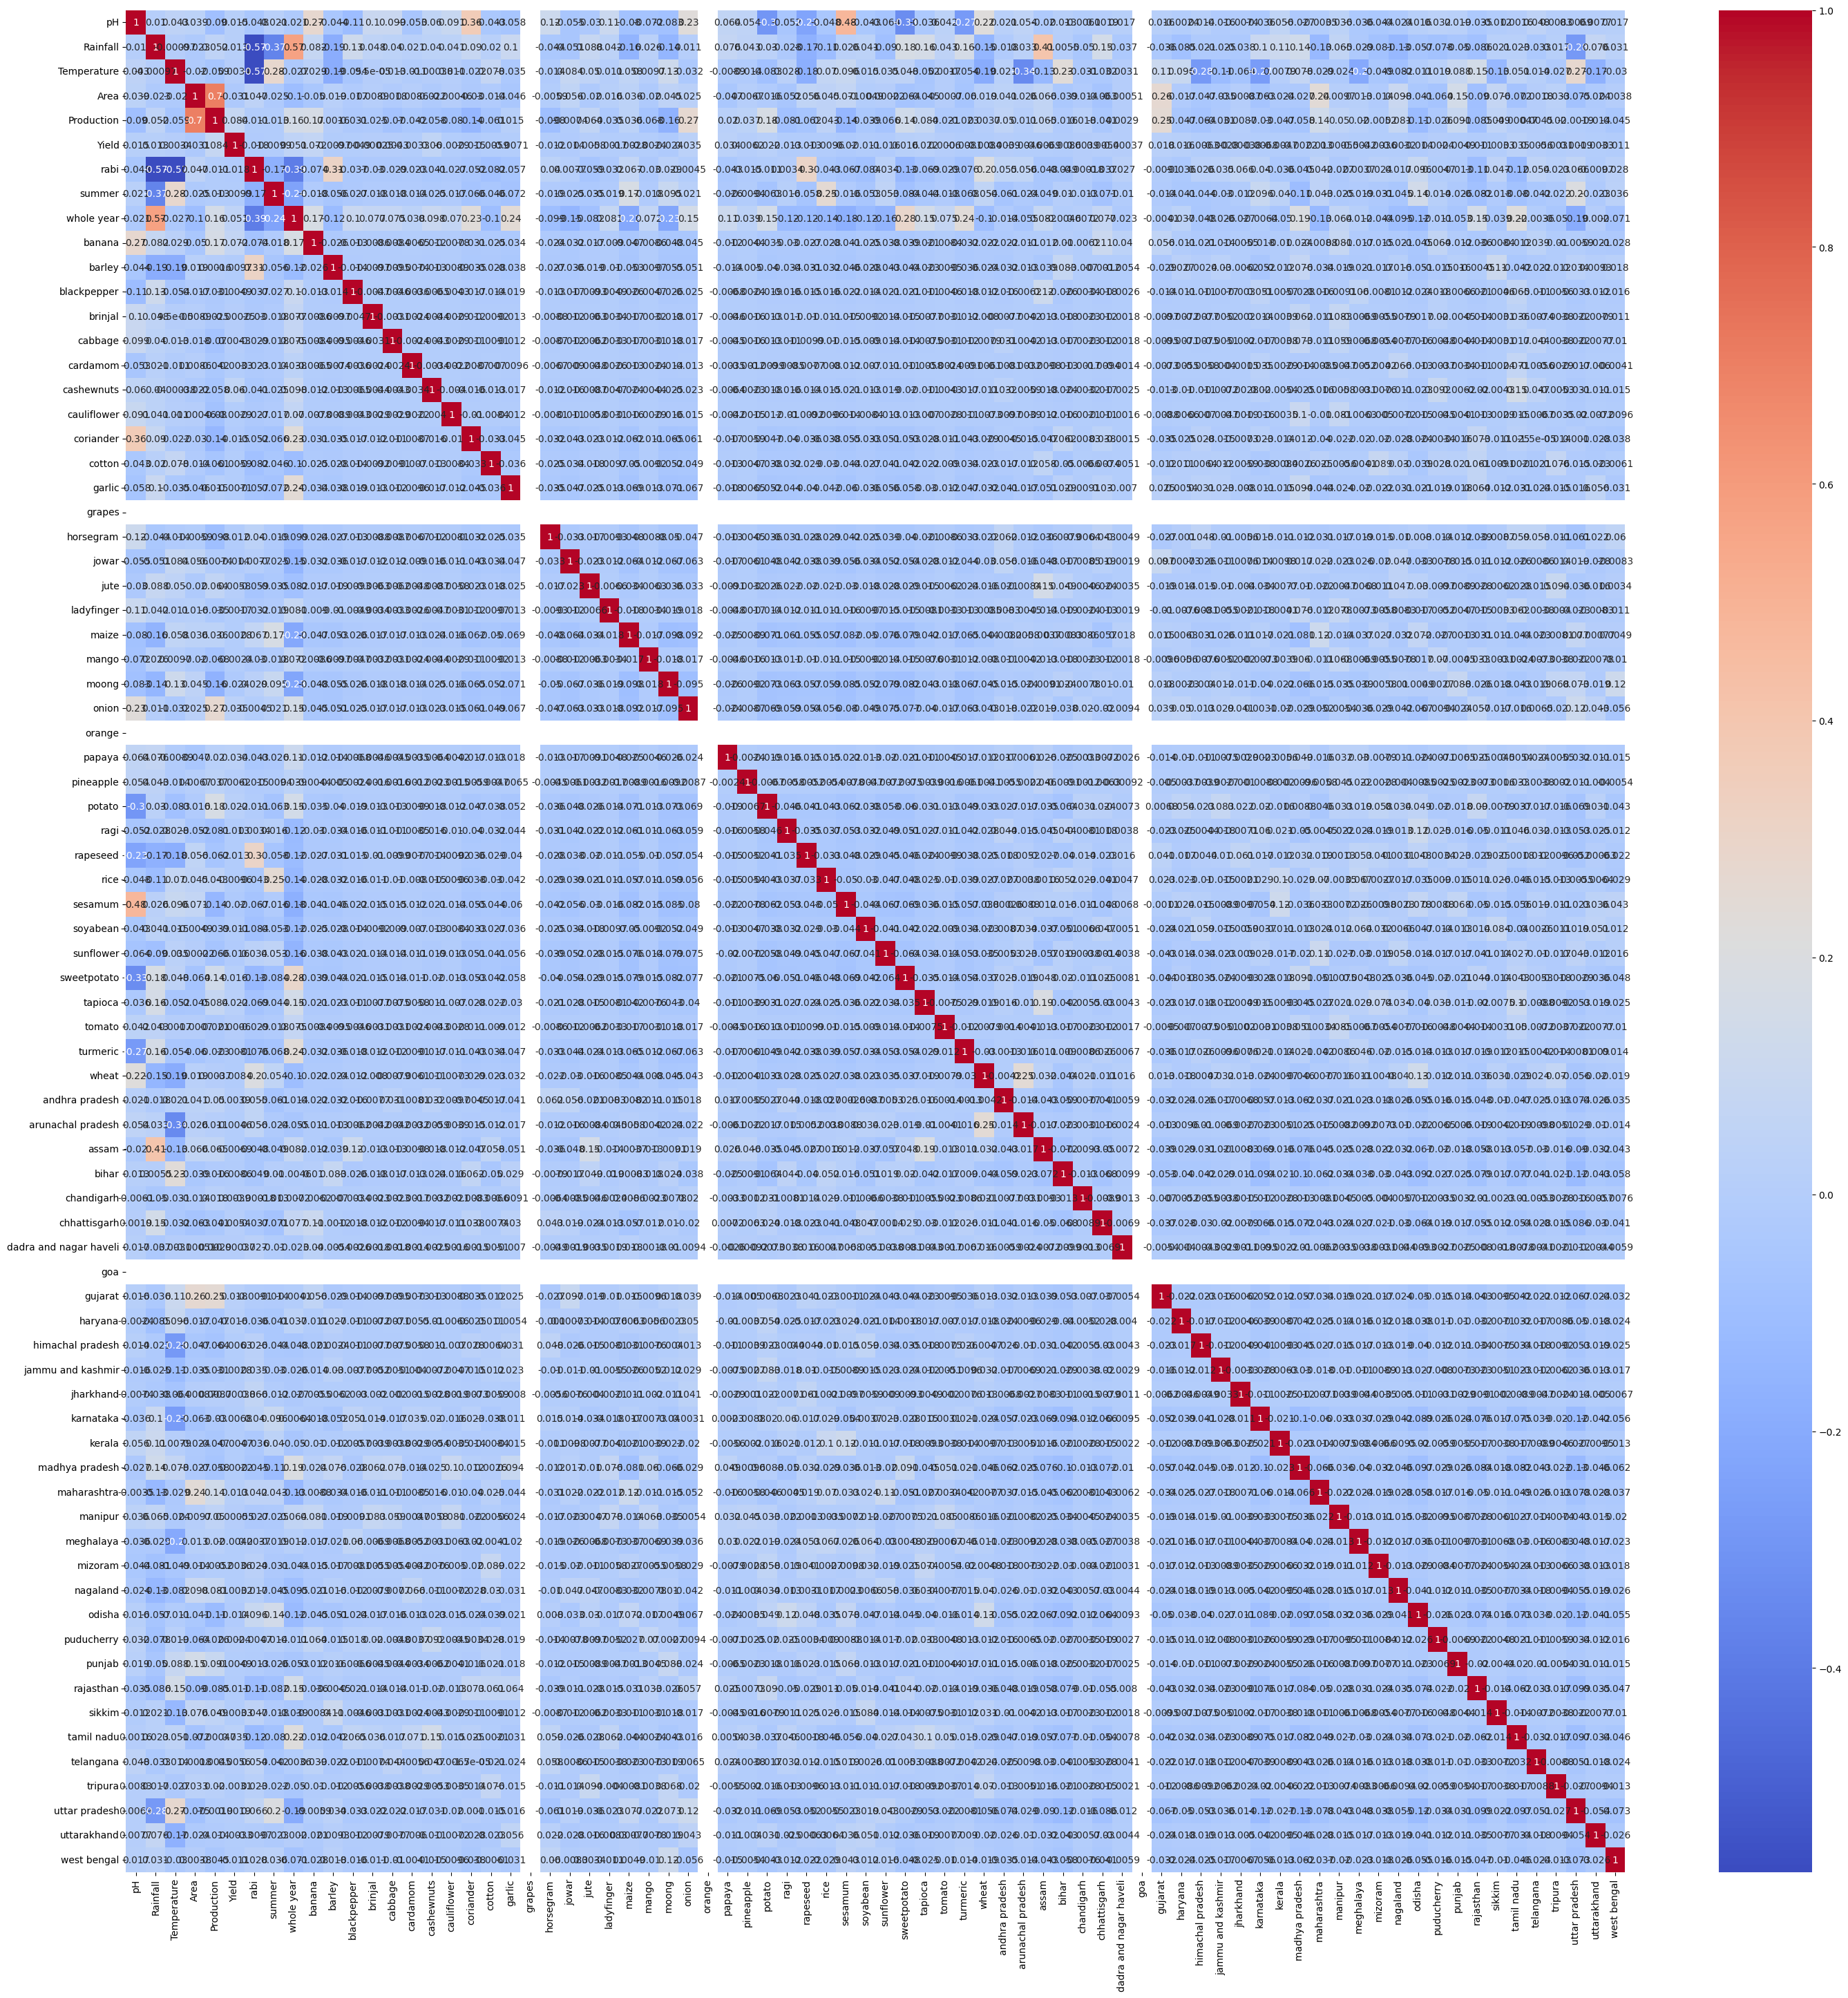

In [46]:
plt.figure(figsize=(35, 35))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# Applying Various Models

In [47]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Yield'])
Y = df['Yield']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2,random_state=2)

## Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [49]:
Y_pred=lr.predict(X_test)
print('MAE: ',mean_absolute_error(Y_test,Y_pred))
print('MSE: ',mean_squared_error(Y_test,Y_pred))
print('R2 Score: ',r2_score(Y_test,Y_pred))

MAE:  6.581192190815561
MSE:  117.9336335606859
R2 Score:  -0.23035855975850072


## Ridge Regression

In [50]:
from sklearn.linear_model import Ridge 
r=Ridge(alpha=0.01)
r.fit(X_train,Y_train)

Ridge(alpha=0.01)

In [51]:
Y_pred=r.predict(X_test)
print('MAE: ',mean_absolute_error(Y_test,Y_pred))
print('MSE: ',mean_squared_error(Y_test,Y_pred))
print('R2 Score: ',r2_score(Y_test,Y_pred))

MAE:  6.580936310840092
MSE:  117.92271069453591
R2 Score:  -0.23024460548219294


## Lasso Regression

In [52]:
from sklearn.linear_model import Lasso
L=Lasso(alpha=3.9)
L.fit(X_train,Y_train)

Lasso(alpha=3.9)

In [53]:
Y_pred=L.predict(X_test)
print('MAE: ',mean_absolute_error(Y_test,Y_pred))
print('MSE: ',mean_squared_error(Y_test,Y_pred))
print('R2 Score: ',r2_score(Y_test,Y_pred))

MAE:  3.5246403259768013
MSE:  62.670524927954496
R2 Score:  0.3461812846630412


## Decision Tree

In [54]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion="squared_error",max_depth=None)
dtr.fit(X_train,Y_train)

DecisionTreeRegressor()

In [55]:
Y_pred=dtr.predict(X_test)
print('MAE: ',mean_absolute_error(Y_test,Y_pred))
print('MSE: ',mean_squared_error(Y_test,Y_pred))
print('R2 Score: ',r2_score(Y_test,Y_pred))

MAE:  0.3265467713504067
MSE:  11.515924169068802
R2 Score:  0.8798585658123328


### Hyperparameter Tuning for DecisionTree

In [56]:
param_dist={
    "criterion":["squared_error", "friedman_mse", "absolute_error", "poisson"],
    "max_depth":[1,2,3,4,5,6,None]
}

In [57]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(dtr,param_grid=param_dist,cv=10,n_jobs=-1)

## Random Forest

In [58]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=42)
rfr.fit(X_train,Y_train)

RandomForestRegressor(random_state=42)

In [59]:
Y_pred=rfr.predict(X_test)
print('MAE: ',mean_absolute_error(Y_test,Y_pred))
print('MSE: ',mean_squared_error(Y_test,Y_pred))
print('R2 Score: ',r2_score(Y_test,Y_pred))

MAE:  0.27617547028253997
MSE:  13.737059656150628
R2 Score:  0.8566862698658313


## Adaboost

In [60]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor()
abr.fit(X_train,Y_train)

AdaBoostRegressor()

In [61]:
Y_pred=abr.predict(X_test)
print('MAE: ',mean_absolute_error(Y_test,Y_pred))
print('MSE: ',mean_squared_error(Y_test,Y_pred))
print('R2 Score: ',r2_score(Y_test,Y_pred))

MAE:  4.458979905613904
MSE:  65.33113073513736
R2 Score:  0.31842415524901246


## KNNeighbours

In [62]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(X_train,Y_train)

KNeighborsRegressor()

In [63]:
Y_pred=knn.predict(X_test)
print('MAE: ',mean_absolute_error(Y_test,Y_pred))
print('MSE: ',mean_squared_error(Y_test,Y_pred))
print('R2 Score: ',r2_score(Y_test,Y_pred))

MAE:  0.7095823428416693
MSE:  15.651158564191881
R2 Score:  0.8367171744972813


## XgBoost

In [64]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [65]:
Y_pred=xgb.predict(X_test)
print('MAE: ',mean_absolute_error(Y_test,Y_pred))
print('MSE: ',mean_squared_error(Y_test,Y_pred))
print('R2 Score: ',r2_score(Y_test,Y_pred))

MAE:  0.9396331307425639
MSE:  946.6356048141528
R2 Score:  -8.875903795976319


### Hyperparameter Tuning for XGBoost

In [66]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, n_jobs=-1, scoring='r2', verbose=2)

In [67]:
xgb=XGBRegressor(colsample_bytree= 1.0, gamma= 0.1, learning_rate= 0.1, max_depth= 3, n_estimators= 300, subsample= 1.0)
xgb.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [68]:
Y_pred=xgb.predict(X_test)
print('MAE: ',mean_absolute_error(Y_test,Y_pred))
print('MSE: ',mean_squared_error(Y_test,Y_pred))
print('R2 Score: ',r2_score(Y_test,Y_pred))

MAE:  0.6355653971964628
MSE:  13.292805439888584
R2 Score:  0.8613210119761516


In [69]:
df.shape

(33186, 76)

## LightGBM

In [70]:
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor()

In [71]:
lgbm.fit(X_train,Y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 922
[LightGBM] [Info] Number of data points in the train set: 26548, number of used features: 72
[LightGBM] [Info] Start training from score 4.921826


LGBMRegressor()

In [72]:
Y_pred=lgbm.predict(X_test)
print('MAE: ',mean_absolute_error(Y_test,Y_pred))
print('MSE: ',mean_squared_error(Y_test,Y_pred))
print('R2 Score: ',r2_score(Y_test,Y_pred))

MAE:  1.514161087389283
MSE:  84.79358963680504
R2 Score:  0.11537942423686309


## CatBoost

In [73]:
from catboost import CatBoostRegressor
cbr=CatBoostRegressor()

In [74]:
cbr.fit(X_train,Y_train)

Learning rate set to 0.068735
0:	learn: 63.6239345	total: 140ms	remaining: 2m 19s
1:	learn: 62.5632658	total: 142ms	remaining: 1m 10s
2:	learn: 61.6311390	total: 144ms	remaining: 48s
3:	learn: 60.7009332	total: 147ms	remaining: 36.5s
4:	learn: 59.8067769	total: 149ms	remaining: 29.6s
5:	learn: 58.7573755	total: 151ms	remaining: 25.1s
6:	learn: 57.7146410	total: 154ms	remaining: 21.8s
7:	learn: 56.7577586	total: 156ms	remaining: 19.3s
8:	learn: 55.8361139	total: 158ms	remaining: 17.4s
9:	learn: 55.0184944	total: 161ms	remaining: 15.9s
10:	learn: 54.0521340	total: 164ms	remaining: 14.7s
11:	learn: 53.2612786	total: 166ms	remaining: 13.7s
12:	learn: 52.4902241	total: 169ms	remaining: 12.8s
13:	learn: 51.7191138	total: 171ms	remaining: 12.1s
14:	learn: 50.8677808	total: 174ms	remaining: 11.4s
15:	learn: 49.9548584	total: 176ms	remaining: 10.8s
16:	learn: 49.2364253	total: 178ms	remaining: 10.3s
17:	learn: 48.3979368	total: 181ms	remaining: 9.86s
18:	learn: 47.5396590	total: 183ms	remaining

In [75]:
Y_pred=cbr.predict(X_test)
print('MAE: ',mean_absolute_error(Y_test,Y_pred))
print('MSE: ',mean_squared_error(Y_test,Y_pred))
print('R2 Score: ',r2_score(Y_test,Y_pred))

MAE:  0.42191078387164
MSE:  5.389448136466548
R2 Score:  0.9437738544393786


### Hyperparameter tuning for Catboost

In [76]:
from sklearn.model_selection import GridSearchCV
# Define the parameter distribution
param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7],
    'bagging_temperature': [0, 1, 2, 3],
    'border_count': [32, 50, 100]
}

In [77]:
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=cbr,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=3
)

In [78]:
cbr=CatBoostRegressor(learning_rate= 0.1,
                      l2_leaf_reg= 3,
                      iterations= 300,
                      depth= 8,
                      border_count= 50,
                      bagging_temperature= 0)

In [79]:
cbr.fit(X_train,Y_train)

0:	learn: 62.9272757	total: 7.25ms	remaining: 2.17s
1:	learn: 61.3224710	total: 13ms	remaining: 1.93s
2:	learn: 59.7621519	total: 17.5ms	remaining: 1.73s
3:	learn: 58.2268125	total: 22ms	remaining: 1.63s
4:	learn: 56.7394770	total: 25.3ms	remaining: 1.49s
5:	learn: 55.3222666	total: 28.7ms	remaining: 1.41s
6:	learn: 53.9481986	total: 32.2ms	remaining: 1.35s
7:	learn: 52.6223658	total: 39ms	remaining: 1.42s
8:	learn: 51.4146535	total: 41.3ms	remaining: 1.33s
9:	learn: 50.1241830	total: 44.1ms	remaining: 1.28s
10:	learn: 48.9425368	total: 46.9ms	remaining: 1.23s
11:	learn: 47.7121538	total: 50.8ms	remaining: 1.22s
12:	learn: 46.5119075	total: 54.5ms	remaining: 1.2s
13:	learn: 45.3413746	total: 57.5ms	remaining: 1.17s
14:	learn: 44.2149256	total: 60.3ms	remaining: 1.15s
15:	learn: 43.1543424	total: 63.1ms	remaining: 1.12s
16:	learn: 42.0902347	total: 66ms	remaining: 1.1s
17:	learn: 41.0364443	total: 68.8ms	remaining: 1.08s
18:	learn: 40.0183005	total: 72.1ms	remaining: 1.07s
19:	learn: 39

In [80]:
Y_pred=cbr.predict(X_test)
print('MAE: ',mean_absolute_error(Y_test,Y_pred))
print('MSE: ',mean_squared_error(Y_test,Y_pred))
print('R2 Score: ',r2_score(Y_test,Y_pred))

MAE:  0.729827480882282
MSE:  7.927180485365215
R2 Score:  0.9172986189736889


### Since not a single model is giving us the perfect result we will use a combination of multiple models to obtain the perfect model

# Voting Ensemble

In [81]:
from sklearn.ensemble import VotingRegressor
xbg=XGBRegressor()
cbr=CatBoostRegressor()
dtr=DecisionTreeRegressor()
ensemble = VotingRegressor(estimators=[('xgb', xgb),('cbr',cbr),('dtr',dtr)])

In [82]:
ensemble.fit(X_train,Y_train)

Learning rate set to 0.068735
0:	learn: 63.6239345	total: 2.27ms	remaining: 2.27s
1:	learn: 62.5632658	total: 5.13ms	remaining: 2.56s
2:	learn: 61.6311390	total: 7.84ms	remaining: 2.61s
3:	learn: 60.7009332	total: 10.5ms	remaining: 2.62s
4:	learn: 59.8067769	total: 13.2ms	remaining: 2.63s
5:	learn: 58.7573755	total: 15.9ms	remaining: 2.63s
6:	learn: 57.7146410	total: 18.6ms	remaining: 2.63s
7:	learn: 56.7577586	total: 21.3ms	remaining: 2.65s
8:	learn: 55.8361139	total: 24ms	remaining: 2.64s
9:	learn: 55.0184944	total: 26.7ms	remaining: 2.64s
10:	learn: 54.0521340	total: 29.4ms	remaining: 2.64s
11:	learn: 53.2612786	total: 32.1ms	remaining: 2.64s
12:	learn: 52.4902241	total: 34.9ms	remaining: 2.65s
13:	learn: 51.7191138	total: 37.6ms	remaining: 2.65s
14:	learn: 50.8677808	total: 40.3ms	remaining: 2.65s
15:	learn: 49.9548584	total: 43.1ms	remaining: 2.65s
16:	learn: 49.2364253	total: 45.7ms	remaining: 2.64s
17:	learn: 48.3979368	total: 48.4ms	remaining: 2.64s
18:	learn: 47.5396590	total:

VotingRegressor(estimators=[('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=1.0, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=0.1, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0...
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=3,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=300,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=None, ...)),
                            ('cbr',
                             <catboost.core.CatBoostRegressor object at 0x000001C438B9AE10>),
                            ('dtr', DecisionTreeRegressor())])

In [83]:
Y_pred=ensemble.predict(X_test)
print('MAE: ',mean_absolute_error(Y_test,Y_pred))
print('MSE: ',mean_squared_error(Y_test,Y_pred))
print('R2 Score: ',r2_score(Y_test,Y_pred))

MAE:  0.3211977521118263
MSE:  2.43942274204849
R2 Score:  0.9745503927850703


#### Hence we have obtained our model as the Voting Regressor combination of XGBoost, CatBoost and Decision Tree

# Model Evaluation

In [84]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Training performance
Y_train_pred = ensemble.predict(X_train)
train_r2 = r2_score(Y_train, Y_train_pred)
train_mae = mean_absolute_error(Y_train, Y_train_pred)
train_mse = mean_squared_error(Y_train, Y_train_pred)

print(f"Training R2: {train_r2}")
print(f"Training MAE: {train_mae}")
print(f"Training MSE: {train_mse}")

# Test performance
Y_test_pred = ensemble.predict(X_test)
test_r2 = r2_score(Y_test, Y_test_pred)
test_mae = mean_absolute_error(Y_test, Y_test_pred)
test_mse = mean_squared_error(Y_test, Y_test_pred)

print(f"Test R2: {test_r2}")
print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")


Training R2: 0.9999487248939759
Training MAE: 0.20737326586929078
Training MSE: 0.21391647869147679
Test R2: 0.9745503927850703
Test MAE: 0.3211977521118263
Test MSE: 2.43942274204849


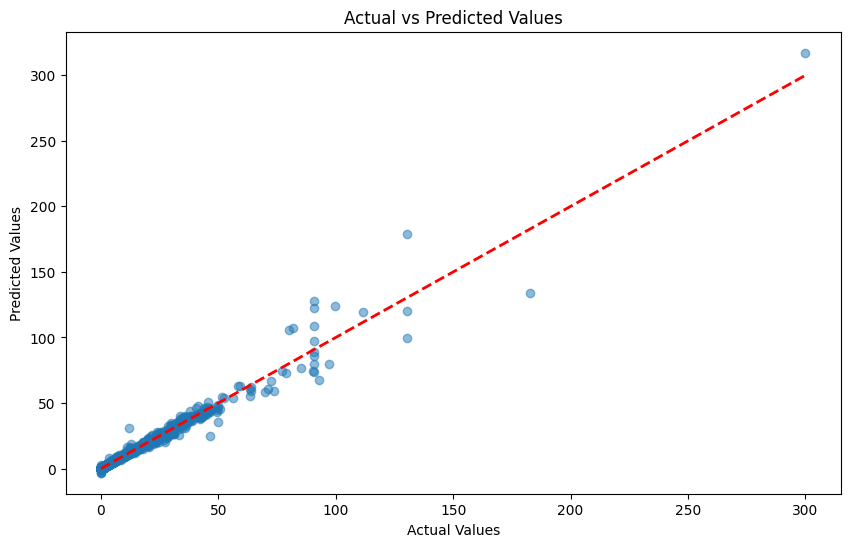

In [85]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## Taking inputs 

In [86]:
pd.set_option('display.max_columns', None)
df.head()

pH  Rainfall  Temperature      Area  Production     Yield   rabi  \
3   5.62    654.34    29.266667  7.937375    8.496990  1.750000  False   
4   5.68    654.34    29.266667  7.170120    6.214608  0.384615  False   
8   6.00    288.30    25.460000  6.396930    5.298317  0.333333   True   
10  5.54    288.30    25.460000  6.396930    7.783224  4.000000   True   
11  5.60    288.30    25.460000  6.396930    6.907755  1.666667   True   

    summer  whole year  banana  barley  blackpepper  brinjal  cabbage  \
3    False       False   False   False        False    False    False   
4    False       False   False   False        False    False    False   
8    False       False   False   False        False    False    False   
10   False       False   False   False        False    False    False   
11   False       False   False   False        False    False    False   

    cardamom  cashewnuts  cauliflower  coriander  cotton  garlic  grapes  \
3      False       False        False      False   False   False   False   
4      False       False        False      False   False   False   False   
8      False       False        False      False   False   False   False   
10     False       False        False      False   False   False   False   
11     False       False        False      False   False   False   False   

    horsegram  jowar   jute  ladyfinger  maize  mango  moong  onion  orange  \
3       False  False  False       False   True  False  False  False   False   
4       False  False  False       False  False  False   True  False   False   
8        True  False  False       False  False  False  False  False   False   
10      False  False  False       False   True  False  False  False   False   
11      False  False  False       False  False  False  False  False   False   

    papaya  pineapple  potato   ragi  rapeseed   rice  sesamum  soyabean  \
3    False      False   False  False     False  False    False     False   
4    False      False   False  False     False  False    False     False   
8    False      False   False  False     False  False    False     False   
10   False      False   False  False     False  False    False     False   
11   False      False   False   True     False  False    False     False   

    sunflower  sweetpotato  tapioca  tomato  turmeric  wheat  andhra pradesh  \
3       False        False    False   False     False  False            True   
4       False        False    False   False     False  False            True   
8       False        False    False   False     False  False            True   
10      False        False    False   False     False  False            True   
11      False        False    False   False     False  False            True   

    arunachal pradesh  assam  bihar  chandigarh  chhattisgarh  \
3               False  False  False       False         False   
4               False  False  False       False         False   
8               False  False  False       False         False   
10              False  False  False       False         False   
11              False  False  False       False         False   

    dadra and nagar haveli    goa  gujarat  haryana  himachal pradesh  \
3                    False  False    False    False             False   
4                    False  False    False    False             False   
8                    False  False    False    False             False   
10                   False  False    False    False             False   
11                   False  False    False    False             False   

    jammu and kashmir  jharkhand  karnataka  kerala  madhya pradesh  \
3               False      False      False   False           False   
4               False      False      False   False           False   
8               False      False      False   False           False   
10              False      False      False   False           False   
11              False      False      False   False           False

In [87]:
import numpy as np

# Define the options for each category
states = ['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 
          'Dadra and Nagar Haveli', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 
          'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 
          'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 
          'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 
          'Uttarakhand', 'West Bengal']

crops = ['Arecanut', 'Barley', 'Banana', 'Blackpepper', 'Brinjal', 'Cabbage', 'Cardamom', 'Cashewnuts', 'Cauliflower', 
         'Coriander', 'Cotton', 'Garlic', 'Grapes', 'Horsegram', 'Jowar', 'Jute', 'Ladyfinger', 'Maize', 
         'Mango', 'Moong', 'Onion', 'Orange', 'Papaya', 'Pineapple', 'Potato', 'Rapeseed', 'Ragi', 'Rice', 
         'Sesamum', 'Soyabean', 'Sunflower', 'Sweetpotato', 'Tapioca', 'Tomato', 'Turmeric', 'Wheat']

seasons = ['Kharif', 'Rabi', 'Summer', 'Whole Year']

# Example inputs (in a real scenario, these would come from user input in the notebook)
state = 'Andaman and Nicobar Islands'
crop = 'Arecanut'
season = 'Kharif'
pH = 0
rainfall = 0
temperature = 0
area = 0
production = 0

# Preprocess input
state_lower = state.lower()
crop_lower = crop.lower()
season_lower = season.lower()

state_encoded = [0] * (len(states) - 1) if state_lower == 'andaman and nicobar islands' else [1 if s.lower() == state_lower else 0 for s in states if s.lower() != 'andaman and nicobar islands']
crop_encoded = [0] * (len(crops) - 1) if crop_lower == 'arecanut' else [1 if c.lower() == crop_lower else 0 for c in crops if c.lower() != 'arecanut']
season_encoded = [0] * (len(seasons) - 1) if season_lower == 'kharif' else [1 if s.lower() == season_lower else 0 for s in seasons if s.lower() != 'kharif']

input_features = np.array(state_encoded + crop_encoded + season_encoded + [pH, rainfall, temperature, area, production]).reshape(1, -1)

# Ensure the input_features array has the correct shape
expected_num_features = len(states) + len(crops) + len(seasons) - 3 + 5  # Exclude the dropped categories and include additional fields
if input_features.shape[1] != expected_num_features:
    print(f"Feature shape mismatch, expected: {expected_num_features}, got: {input_features.shape[1]}")
else:
    # The input_features is now ready to be used for prediction
    print("Input features shape:", input_features.shape)
    print("Input features:", input_features)

# For prediction, you would use the loaded model
predicted_yield = ensemble.predict(input_features)
print(f'The predicted yield for the selected inputs is: {predicted_yield[0]:.2f} tons/hectare')


Input features shape: (1, 75)
Input features: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0]]
The predicted yield for the selected inputs is: 0.88 tons/hectare


C:\Users\AARON\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [88]:
# Inspect individual models in a VotingRegressor
for idx, est in enumerate(ensemble.estimators_):
    print(f"Estimator {idx + 1}: {est}")
    if hasattr(est, 'intercept_'):
        print(f"  Intercept: {est.intercept_}")
    if hasattr(est, 'feature_importances_'):
        print(f"  Feature importances: {est.feature_importances_}")


Estimator 1: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
  Feature importances: [2.62278728e-02 4.19641176e-04 2.19321717e-03 8.36113989e-01
 6.44192472e-02 1.75390051e-05 0.00000000e+00 3.76928272e-03
 9.73004475e-03 0.00000000e+00 0.00000000e+00 1.41681849e-05
 1.70039537e-03 0.00000000e+00 0.00000000

## Saving the model

In [89]:
import joblib
from joblib import dump
# File path where you want to save the .sav file
save_path = 'ensemble.sav'

# Save the ensemble to .sav file
dump(ensemble, save_path)

['ensemble.sav']

In [92]:
import pickle 
with open('ensemble.pkl', 'wb') as file:
    pickle.dump(ensemble, file)